<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/statistical_inference_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code will load in a data set corresponding to the 2024 WNBA season. If you need to know what the variables mean you can find the original dataset [here](https://www.basketball-reference.com/wnba/years/2024_per_game.html):

### **Clone Business Analytics Repository**

In [1]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 458, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 458 (delta 154), reused 192 (delta 115), pack-reused 202 (from 1)
Receiving objects: 100% (458/458), 7.64 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (244/244), done.


### **Import Libraries**

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt

### **Read In the Dataset**

In [3]:
df = pd.read_csv('/content/business-analytics/datasets/sportsref_download.csv')

### **Show First Five Rows**

In [5]:
df.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Lindsay Allen,CHI,G,39,925,39,27,23.7,2.6,5.5,0.472,0.4,1.2,0.311,2.3,4.4,0.515,1.1,1.3,0.808,0.3,2.0,3.9,0.8,0.2,1.6,1.6,6.7
1,Rebecca Allen,PHO,F-G,18,447,18,18,24.8,2.9,7.1,0.417,1.4,3.9,0.352,1.6,3.1,0.500,0.1,0.2,0.667,0.7,3.9,1.1,0.9,0.7,1.0,1.9,7.4
2,Laeticia Amihere,ATL,F,15,73,15,0,4.9,0.4,1.6,0.250,0.0,0.0,NaN,0.4,1.6,0.250,0.3,1.1,0.294,0.8,1.7,0.2,0.1,0.2,0.4,0.5,1.1
3,Ariel Atkins,WAS,G,39,1175,39,39,30.1,5.4,12.5,0.432,1.9,5.5,0.346,3.5,7.0,0.500,2.2,2.5,0.848,0.9,3.5,3.1,1.4,0.4,2.3,2.8,14.9
4,Amy Atwell,PHO,F,5,41,5,0,8.2,0.6,2.2,0.273,0.4,1.8,0.222,0.2,0.4,0.500,0.2,0.2,1.000,0.6,0.8,0.6,0.0,0.2,0.4,0.6,1.8


### **Skewed Left**

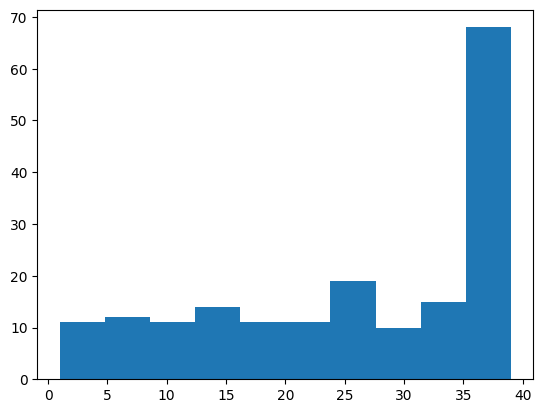

In [51]:
plt.hist(df['G'])
plt.show()

### **Skewed Right**

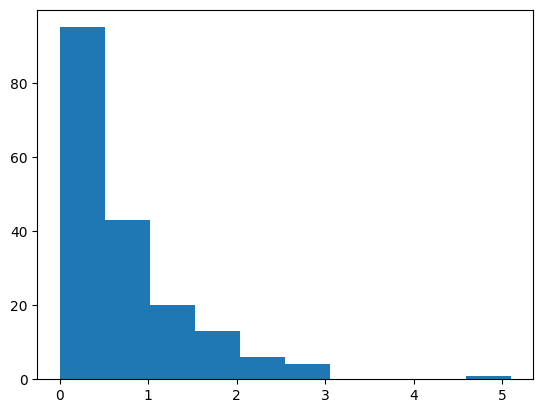

In [54]:
plt.hist(df['ORB'])
plt.show()

### **Team Assists**

In [16]:
df['Total_Assists'] = df.apply(lambda row: row['AST']*row['G'], axis=1)
m = df.groupby('Team')['Total_Assists'].sum().sort_values(ascending=False)

### **Bar Plot**

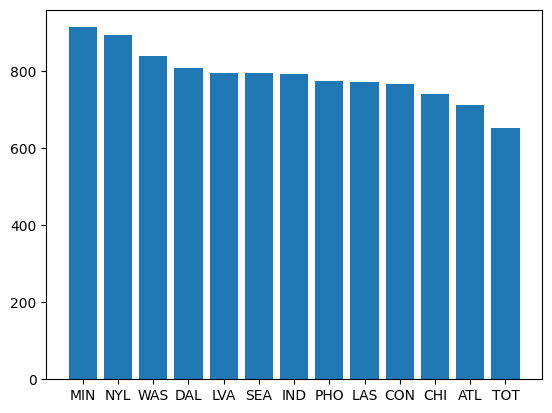

In [17]:
plt.bar(m.index, m.values)
plt.show()

### **Constructing a Random Sample**

In [18]:
random_sample = df.sample(n=100, random_state=42)
random_sample.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS,Total_Assists
19,Maya Caldwell,ATL,G,24,381,24,6,15.9,2.1,5.0,0.417,0.6,2.0,0.298,1.5,3.0,0.493,0.4,0.5,0.769,0.8,1.8,1.1,0.6,0.2,0.9,1.3,5.2,26.4
42,Diamond DeShields,CHI,G,32,441,32,10,13.8,1.8,5.0,0.348,0.3,1.6,0.173,1.5,3.4,0.431,0.7,1.1,0.611,0.2,1.4,1.3,0.6,0.3,0.9,1.6,4.5,41.6
154,Sug Sutton,TOT,G,28,370,28,0,13.2,0.9,2.8,0.312,0.4,1.4,0.256,0.5,1.4,0.368,0.3,0.5,0.692,0.2,1.0,2.2,0.6,0.0,1.1,0.9,2.4,61.6
98,Michaela Onyenwere,CHI,F,33,610,33,17,18.5,2.6,6.1,0.426,0.7,1.9,0.381,1.9,4.2,0.446,0.8,1.2,0.610,0.5,1.8,0.9,0.6,0.3,1.2,2.0,6.7,29.7
146,Monique Billings,TOT,F,36,825,36,14,22.9,3.0,6.4,0.467,0.1,0.4,0.214,2.9,6.0,0.484,1.6,2.0,0.803,1.8,5.8,1.5,0.8,0.5,1.8,2.3,7.6,54.0


### **Sample Size: 10**

In [45]:
for i in range(10):
  new_df = df.sample(10, random_state=i)
  print(new_df['G'].mean())

24.2
29.7
25.6
26.9
21.6
34.4
21.2
30.0
20.9
20.9


In [44]:
def sample_mean(key: int) -> float:
  new_df = df.sample(10, random_state=key)
  return new_df['G'].mean()

list(map(sample_mean, range(10)))

[24.2, 29.7, 25.6, 26.9, 21.6, 34.4, 21.2, 30.0, 20.9, 20.9]

### **Sample Size: 100**

In [47]:
def sample_mean(key: int) -> float:
  new_df = df.sample(100, random_state=key)
  return new_df['G'].mean()

list(map(sample_mean, range(10)))

[25.49, 24.7, 24.71, 25.69, 25.37, 26.1, 25.97, 26.16, 23.69, 25.51]

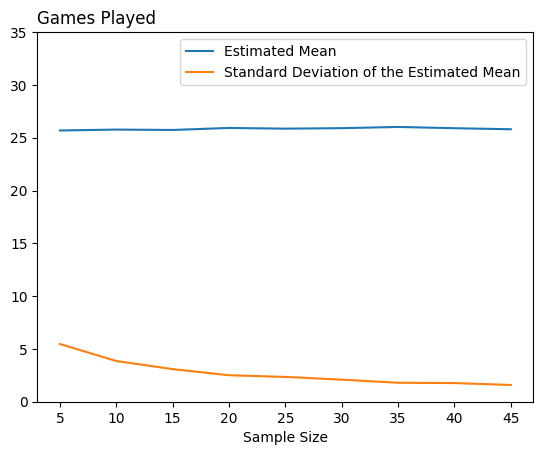

In [48]:
results = {'means': [],
           'stds': []}

for i in range(5, 50, 5):
  temp = []
  for j in range(500):
    new_df = df.sample(i)
    temp.append(new_df['G'].mean())
  results['means'].append(np.mean(temp))
  results['stds'].append(np.std(temp))

plt.plot(range(5, 50, 5), results['means'], label='Estimated Mean')
plt.plot(range(5, 50, 5), results['stds'], label='Standard Deviation of the Estimated Mean')
plt.ylim(0, 35)
plt.title('Games Played', loc='left')
plt.xlabel('Sample Size')
plt.legend()
plt.show()

### **Filtering as a Way to Produce a non-random Sample**

In [7]:
boolean_series = df['Team'] == 'IND'
non_random_sample = df[boolean_series]
non_random_sample.head()

,Player,Team,Pos,G,MP,G.1,GS,MP.1,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,PTS
7,Grace Berger,IND,G,10,91,10,0,9.1,0.9,2.2,0.409,0.2,0.5,0.400,0.7,1.7,0.412,0.9,1.4,0.643,0.3,1.2,0.6,0.4,0.0,0.8,1.2,2.9
10,Aliyah Boston,IND,F-C,39,1218,39,39,31.2,5.9,11.3,0.526,0.2,0.7,0.269,5.8,10.6,0.542,2.0,2.8,0.731,2.8,9.0,3.2,0.9,1.3,2.0,3.3,14.1
30,Caitlin Clark,IND,G,39,1396,39,39,35.8,6.2,14.7,0.417,3.1,9.0,0.341,3.1,5.7,0.538,4.1,4.6,0.904,0.4,5.7,8.4,1.3,0.7,5.6,2.8,19.5
39,Damiris Dantas,IND,F,19,195,19,0,10.3,1.7,3.6,0.485,0.6,1.5,0.414,1.1,2.1,0.538,0.4,0.5,0.700,0.2,2.1,0.5,0.3,0.3,0.6,0.9,4.5
51,Temi Fagbenle,IND,C,21,400,21,2,19.0,2.6,5.1,0.505,0.1,0.6,0.167,2.5,4.5,0.547,1.0,1.3,0.786,1.5,4.9,1.0,0.5,0.7,1.1,3.1,6.3
